In [283]:
#import libraries

from numpy import *
from sklearn.datasets import load_digits
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import math

In [284]:
images,labels=load_digits(2,return_X_y=True)

# Labeled training set
training_images=images[:300]
training_labels=labels[:300]

#Labeled test set
test_images=images[300:]
test_labels=labels[300:]

In [285]:
# mean subtraction and SVD

TIT=training_images.T
mean_training=np.mean(TIT,axis=1)

# training_images_bar_transpose

TIBT=mat([[0 for i in range(300)]for j in range(64)])
for i in range(300):
    TIBT[:,i]=mat(TIT[:,i]-mean_training.T).T
Us,Sigma,VsT=la.svd(TIBT)

# compute 2D feature

TIB_2D_ftr=Us[:,0:2].T*TIBT

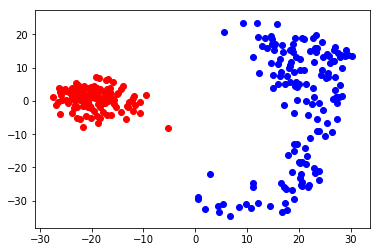

In [286]:
for i in range(300):
    if training_labels[i]==1:
        plt.scatter(TIB_2D_ftr[0,i],TIB_2D_ftr[1,i],color='b')
    else:
        plt.scatter(TIB_2D_ftr[0,i],TIB_2D_ftr[1,i],color='r')

In [287]:
# mean subtraction and SVD of test images

testIT=test_images.T
mean_test=np.mean(testIT,axis=1)

# training_images_bar_transpose

testIBT=mat([[0 for i in range(60)]for j in range(64)])
for i in range(60):
    testIBT[:,i]=mat(testIT[:,i]-mean_test).T
    
Us_test,Sigma_test,Vs_testT=la.svd(testIBT)

# compute 2D feature

testIB_2D_ftr=Us_test[:,0:2].T*testIBT

In [288]:
def kNN(k,testIBftr,TIBftr):
    labels_est=[0 for i in range(60)]
    labels_kNN=[0 for i in range(k)]
    Kmin_index=[0 for i in range(k)]
    for i in range(60):
        ED=[0 for n in range(300)]
        for j in range(300):
            ED[j]=la.norm(testIBftr[:,i]-TIBftr[:,j])
        for m in range(k):
            Kmin_index[m]=ED.index(min(ED))
            ED[Kmin_index[m]]=1000000
            labels_kNN[m]=training_labels[Kmin_index[m]]
        num0=labels_kNN.count(0)
        num1=labels_kNN.count(1)
        if num0>num1:
            labels_est[i]=0
        else:
            labels_est[i]=1
    print("The estimated labels of the test images is:",labels_est)
    return labels_est

In [289]:
def find_error(labels_est):
    error=0
    for i in range(60):
        if labels_est[i]!=test_labels[i]:
            error=error+1
    error=error/60
    print("The error is ",error)
    return error

The estimated labels of the test images is: [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
The error is  0.0


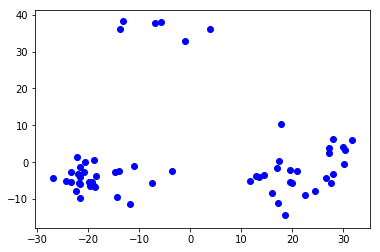

In [290]:
TIB_2D_ftr=mat(TIB_2D_ftr)
testIB_2D_ftr=mat(testIB_2D_ftr)
labels_est_2D=kNN(5,testIB_2D_ftr,TIB_2D_ftr)
error_2D=find_error(labels_est_2D)
for i in range(60):
    if labels_est_2D[i]==test_labels[i]:
        plt.scatter(testIB_2D_ftr[0,i],testIB_2D_ftr[1,i],color='b')
    else:
        plt.scatter(testIB_2D_ftr[0,i],testIB_2D_ftr[1,i],color='black')

In [291]:
sum0=0
for i in range(64):
    for j in range(60):
        sum0=sum0+np.square(testIBT)[i,j]
r=0
for i in range(len(Sigma_test)):
    sum=0
    for j in range(i+1):
        sum=sum+Sigma_test[j]**2
    r=r+1
    if sum/sum0>=0.95:
        break;
print("r=",r)
TIB_rD_ftr=Us[:,0:r].T*TIBT
testIB_rD_ftr=Us_test[:,0:r].T*testIBT

r= 14


k= 1 :
The estimated labels of the test images is: [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
The error is  0.03333333333333333


k= 3 :
The estimated labels of the test images is: [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
The error is  0.03333333333333333


k= 5 :
The estimated labels of the test images is: [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
The error is  0.03333333333333333


k= 7 :
The estimated labels of the test images is: [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 

[0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333]

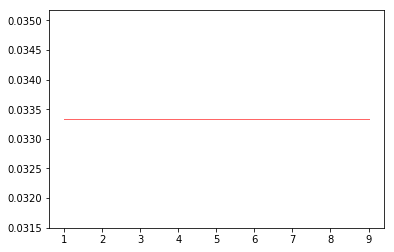

In [304]:
TIB_rD_ftr=mat(TIB_rD_ftr)
testIB_rD_ftr=mat(testIB_rD_ftr)
k=[1,3,5,7,9]
error_rD=[0 for j in range(5)]
for i in k:
    print("k=",i,":")
    labels_est_rD=kNN(i,testIB_rD_ftr,TIB_rD_ftr)
    error_rD[(i-1)//2]=find_error(labels_est_rD)
    print("\n")
plt.plot(k,error_rD, color='r', linewidth=1, alpha=0.6)
error_rD

In this particular problem,the error is same when k=1,3,5,7,9.In general problems,if k is too small,the boundary becomes too irregular;if k is too large,the boundary becomes a straight line.